In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [4]:
import numpy as np
import pandas as pd

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
forest = pd.read_csv("I:\\Assigment - Data Science\\Neural Network\\forestfires.csv")

In [7]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forest.isnull().sum().sum()

0

In [10]:
label_encoder = preprocessing.LabelEncoder()
forest['size_category'] = label_encoder.fit_transform(forest['size_category'])

In [11]:
label_encoder = preprocessing.LabelEncoder()
forest['month'] = label_encoder.fit_transform(forest['month'])

In [12]:
label_encoder = preprocessing.LabelEncoder()
forest['day'] = label_encoder.fit_transform(forest['day'])

In [13]:
label_encoder = preprocessing.LabelEncoder()
forest['FFMC'] = label_encoder.fit_transform(forest['FFMC'])

In [22]:
label_encoder = preprocessing.LabelEncoder()
forest['DMC'] = label_encoder.fit_transform(forest['DMC'])

In [23]:
label_encoder = preprocessing.LabelEncoder()
forest['DC'] = label_encoder.fit_transform(forest['DC'])

In [24]:
label_encoder = preprocessing.LabelEncoder()
forest['ISI'] = label_encoder.fit_transform(forest['ISI'])

In [25]:
label_encoder = preprocessing.LabelEncoder()
forest['temp'] = label_encoder.fit_transform(forest['temp'])

In [26]:
label_encoder = preprocessing.LabelEncoder()
forest['RH'] = label_encoder.fit_transform(forest['RH'])

In [27]:
label_encoder = preprocessing.LabelEncoder()
forest['wind'] = label_encoder.fit_transform(forest['wind'])

In [28]:
label_encoder = preprocessing.LabelEncoder()
forest['rain'] = label_encoder.fit_transform(forest['rain'])

In [59]:
X = forest.iloc[:,0:28]
Y = forest.iloc[:,-1]

In [60]:
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,0,0,1,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,0,0,1,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,1,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,1,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,1,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [62]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
Sequential()

In [64]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 4s 17ms/step - loss: 13.2963 - accuracy: 0.7534 - val_loss: 9.9665 - val_accuracy: 0.6842
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 3.2173 - accuracy: 0.7677 - val_loss: 2.8807 - val_accuracy: 0.5439
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 2.0229 - accuracy: 0.5495 - val_loss: 2.0863 - val_accuracy: 0.6550
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 1.0873 - accuracy: 0.6677 - val_loss: 1.6699 - val_accuracy: 0.6140
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.8902 - accuracy: 0.6350 - val_loss: 1.4747 - val_accuracy: 0.6608
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.7790 - accuracy: 0.7026 - val_loss: 1.2061 - val_accuracy: 0.6667
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.7334 - val_loss: 1.0439 - val_accuracy: 0.6901
Epoch 8/100

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9970 - val_loss: 0.2257 - val_accuracy: 0.9357
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9962 - val_loss: 0.1680 - val_accuracy: 0.9357
Epoch 61/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0413 - accuracy: 0.9888 - val_loss: 0.2645 - val_accuracy: 0.9240
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9987 - val_loss: 0.3500 - val_accuracy: 0.9006
Epoch 63/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9868 - val_loss: 0.1835 - val_accuracy: 0.9357
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9912 - val_loss: 0.1631 - val_accuracy: 0.9415
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9921 - val_loss: 0.1730 - val_accuracy: 0.9474
Epoch 

In [66]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9749
accuracy: 97.49%


In [45]:
# Visualize training history

# list all data in history
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

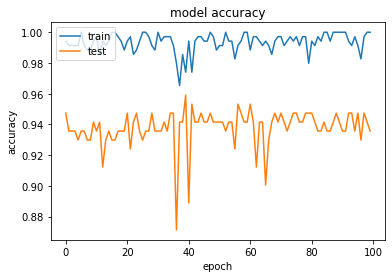

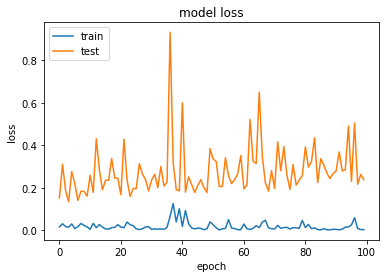

In [48]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
